In [ ]:
#This notebook is used for the pricing through GBM of structured products :
#- 100 KO Call 150
#- Digital option OT 150
#- Digital option window OT 150

Payoff moyen de l'Option 1 (Call 3 ans KO 150%) : 235.73
Payoff moyen de l'Option 2 (Call OT 3 ans 150%) : 1.56
Payoff moyen de l'Option 3 (Call OT 2 ans 150%) : 0.68


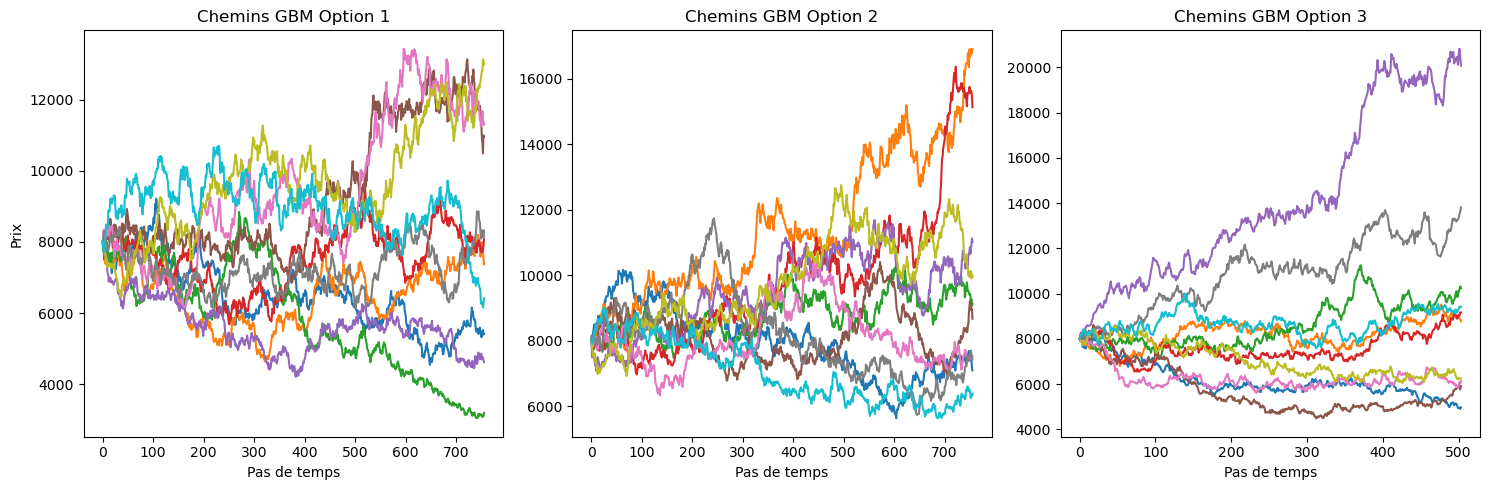

In [15]:
## Pricing 4

import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(s0, mu, sigma, dt, n_steps, n_sims):
    """
    Simule des trajectoires de Geometric Brownian Motion.

    Args:
        s0 (float): Prix initial.
        mu (float): Coefficient de drift.
        sigma (float): Volatilité.
        dt (float): Pas de temps.
        n_steps (int): Nombre de pas de temps.
        n_sims (int): Nombre de simulations.

    Returns:
        numpy.ndarray: Matrice (n_steps x n_sims) des trajectoires simulées.
    """
    rand_matrix = np.random.normal(0, 1, size=(n_steps, n_sims))
    s = np.zeros((n_steps, n_sims))
    s[0, :] = s0
    for t in range(1, n_steps):
        s[t, :] = s[t-1, :] * np.exp((mu - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt)*rand_matrix[t-1, :])
    return s

# Paramètres communs
dt = 1/252       # Pas de temps quotidien
n_sims = 50000  # Nombre de simulations

# ==========================
# Option 1 : Call maturité 3 ans KO 150%
# Si le chemin atteint 12000 à un moment quelconque, le payoff est 0,
# sinon le payoff est max(S_T - 8000, 0)
s0_opt1    = 8000      # Prix initial
mu_opt1    = 0.04071     # Drift
sigma_opt1 = 0.2608     # Volatilité
n_steps_opt1 = 756      # 3 ans (252*3)

paths_opt1 = simulate_gbm(s0_opt1, mu_opt1, sigma_opt1, dt, n_steps_opt1, n_sims)

payoffs_opt1 = []
for i in range(n_sims):
    path = paths_opt1[:, i]
    if np.any(path >= 12000):
        payoff = 0
    else:
        payoff = max(path[-1] - 8000, 0)
    payoffs_opt1.append(payoff)
price_opt1 = np.mean(payoffs_opt1)


# ==========================
# Option 2 : Call OT 3 ans 150%
# Si le chemin atteint 12000 à un moment quelconque, le payoff est fixé à 5, sinon 0.
s0_opt2    = 8000      # Prix initial
mu_opt2    = 0.04071     # Drift
sigma_opt2 = 0.2156     # Volatilité
n_steps_opt2 = 756      # 3 ans

paths_opt2 = simulate_gbm(s0_opt2, mu_opt2, sigma_opt2, dt, n_steps_opt2, n_sims)

payoffs_opt2 = []
for i in range(n_sims):
    path = paths_opt2[:, i]
    if np.any(path >= 12000):
        payoff = 5
    else:
        payoff = 0
    payoffs_opt2.append(payoff)
price_opt2 = np.mean(payoffs_opt2)


# ==========================
# Option 3 : Call OT 2 ans 150%
# On simule sur 2 ans et on vérifie la condition uniquement pendant la 2ème année.
s0_opt3    = 8000      # Prix initial
mu_opt3    = 0.0378     # Drift
sigma_opt3 = 0.2019     # Volatilité
n_steps_opt3 = 504      # 2 ans (252*2)

paths_opt3 = simulate_gbm(s0_opt3, mu_opt3, sigma_opt3, dt, n_steps_opt3, n_sims)

payoffs_opt3 = []
for i in range(n_sims):
    path = paths_opt3[:, i]
    # La 2ème année correspond aux indices 252 à la fin
    if np.any(path[252:] >= 12000):
        payoff = 4
    else:
        payoff = 0
    payoffs_opt3.append(payoff)
price_opt3 = np.mean(payoffs_opt3)


# Affichage des résultats
print("Payoff moyen de l'Option 1 (Call 3 ans KO 150%) : {:.2f}".format(price_opt1))
print("Payoff moyen de l'Option 2 (Call OT 3 ans 150%) : {:.2f}".format(price_opt2))
print("Payoff moyen de l'Option 3 (Call OT 2 ans 150%) : {:.2f}".format(price_opt3))

# ==========================
# Tracé des chemins GBM pour chaque option (pour quelques simulations)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(paths_opt1[:, :10])
plt.xlabel("Pas de temps")
plt.ylabel("Prix")
plt.title("Chemins GBM Option 1")

plt.subplot(1, 3, 2)
plt.plot(paths_opt2[:, :10])
plt.xlabel("Pas de temps")
plt.title("Chemins GBM Option 2")

plt.subplot(1, 3, 3)
plt.plot(paths_opt3[:, :10])
plt.xlabel("Pas de temps")
plt.title("Chemins GBM Option 3")

plt.tight_layout()
plt.show()
